# Analysis Pipeline

Given any segment of time-series data:
- Compute spectrogram (with window length and step length parameters)
- Fit exponential distribution over all frequencies and compute KS test value & p-value
- Compute SCV over same period (maybe throw out 1% outliers?)
- Compute the PSD from that time period (compute the spectrogram mean over time bins)
- Fooof PSD in 3 differe ways (take care to ignore 60Hz power line), and for each, save the fitted slope, offset, and fit error:

     1. Fit straight line over all frequencies (2-80Hz)

     2. Fit lorentzian over all frequencies (2-80Hz)

     3. Fit straight line over only the frequency ranges that are not significant under KS test

In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/Lauren/Voytek/spectralCV')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')
sys.path.append('/Users/rdgao/Documents/code/research/fooof/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# imports
from scv_funcs import access_nt as asc
import numpy as np
import neurodsp as ndsp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import expon
import scipy as sp
import fooof

In [5]:
from scv_funcs import lfpca

In [6]:
#data_path ="/Users/Lauren/Data/NeuroTycho/anesthesia/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
data_path ="/Users/rdgao/Documents/data/NeuroTycho/Propofol/20120730PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/"
session = 1
chan = [1,2,3,4] # start at 1
chan = [1]

# with specified indices
# print(asc.get_cond(data_path, 0,1))
indices = [10000,60000]
indices= [0,0]
data = asc.get_ECoG(data_path, session, chan, indices)

In [8]:
# example of using seg_fit
fs = 1000
nperseg = 1000
noverlap = 0

lfpca = lfpca.LFPCA(data,fs,nperseg,noverlap, spg_outlierpct=2., max_freq=200)

In [9]:
#lfpca.spg_outlierpct = 15.
lfpca.compute_spg()
print(lfpca.spg.shape)
lfpca.compute_psd()
lfpca.compute_scv()


(1, 200, 1929)


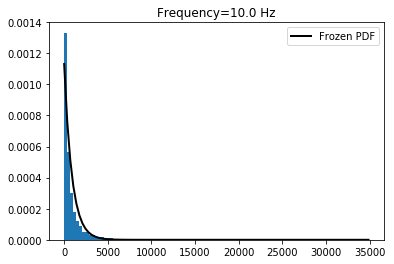

In [10]:
lfpca.plot_expfit(0,10)

In [11]:
lfpca.compute_KS_expfit()

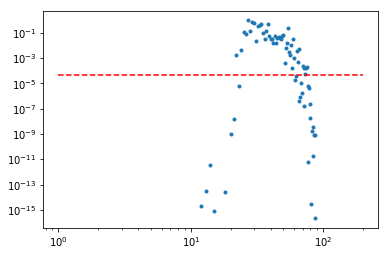

In [12]:
plt.loglog(lfpca.f_axis, lfpca.ks_pvals.T, '.')
plt.plot(lfpca.f_axis, np.ones_like(lfpca.f_axis)*0.01/len(lfpca.f_axis), 'r--')